<a href="https://colab.research.google.com/github/HeldaJessie/Helda.Jessie.io/blob/main/Copy_of_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
import os
import cv2
import shutil
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
shutil.copytree('/content/drive/MyDrive/images','/content/drive/MyDrive/Train')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images'

In [ ]:
shutil.copytree('/content/drive/MyDrive/manual1','/content/drive/MyDrive/Test')

In [ ]:
shutil.copytree('/content/drive/MyDrive/mask','/content/drive/MyDrive/Validate')

In [ ]:
SIZE=512 #Resize images (height  = X, width = Y)


#Capture training image info as a list
train_images = []
path = "/content/drive/MyDrive/Train/*.*"

for file in sorted(glob.glob(path)):
        #img = cv2.imread(file, 0)
        img = cv2.imread(file, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = img/255.
        #img= img.astype(np.float32)
        train_images.append(img)

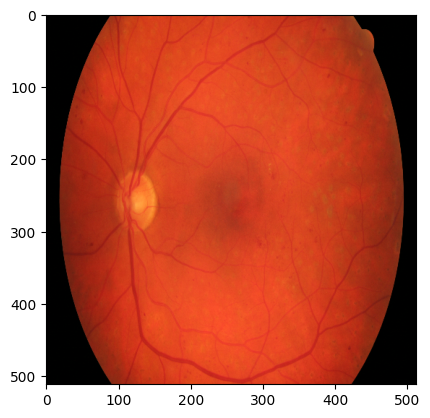

In [ ]:
plt.imshow(train_images[0])

In [ ]:
print(np.max(train_images))

255


In [ ]:
len(train_images)

45

In [ ]:
import glob
SIZE=512 #Resize images (height  = X, width = Y)
import cv2

#Capture training image info as a list
train_masks = []
path = "/content/drive/MyDrive/Test/*.*"

for file in sorted(glob.glob(path)):
        img = cv2.imread(file,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(SIZE, SIZE))
        img=np.array(img)
        for i in range (0,SIZE):
          for j in range (0,SIZE):
            #print(img[i,j])
            if img[i,j]>125:
              img[i,j]=1
            else:
              img[i,j]=0

        train_masks.append(img)

In [ ]:
train_images= np.array(train_images)

In [ ]:
train_images

array([[[[1, 1, 0],
         [0, 0, 0],
         [0, 1, 0],
         ...,
         [1, 1, 0],
         [0, 1, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 1, 0],
         [0, 0, 1],
         ...,
         [1, 1, 0],
         [0, 1, 0],
         [1, 2, 0]],

        [[0, 1, 0],
         [0, 0, 0],
         [1, 1, 0],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [0, 1, 0]],

        ...,

        [[0, 1, 0],
         [0, 1, 0],
         [0, 0, 0],
         ...,
         [1, 1, 0],
         [0, 1, 0],
         [0, 1, 0]],

        [[1, 1, 0],
         [1, 1, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 1, 0],
         [1, 2, 0]],

        [[1, 2, 0],
         [0, 1, 0],
         [2, 2, 0],
         ...,
         [1, 2, 0],
         [0, 0, 0],
         [0, 1, 0]]],


       [[[0, 0, 0],
         [0, 1, 1],
         [0, 0, 0],
         ...,
         [0, 1, 0],
         [0, 0, 0],
         [0, 1, 0]],

        [[1, 2, 0],
         [0,

1
0


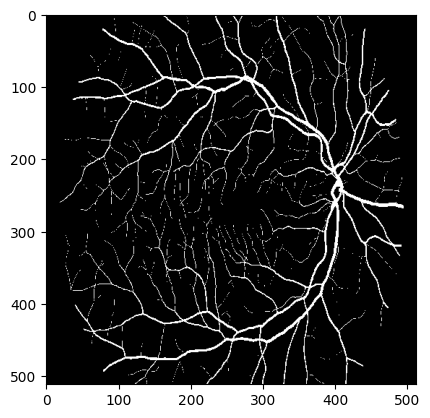

In [ ]:
plt.imshow(train_masks[1]*255,cmap='gray')

print(np.max(train_masks[1]))
print(np.min(train_masks[1]))

In [ ]:
train_masks= np.array(train_masks)
print(train_masks.shape)

(45, 512, 512)


In [ ]:
train_masks=np.expand_dims(train_masks,axis=-1)
#train_masks= np.squeeze(train_masks)
train_masks.shape

(45, 512, 512, 1)

In [ ]:
train_masks
print(np.max(train_masks))

1


In [ ]:
IMG_HEIGHT = 512
IMG_WIDTH =512
IMG_CHANNELS =3

In [ ]:
## above basic of any model

In [ ]:
##IoU
def iou_metric(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)   # <--- added this line
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return (intersection + smooth) / (union + smooth)

In [ ]:
#dice coefficient
def dice_coef(y_true, y_pred, smooth=1e-6):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

In [ ]:
##precision
def precision_metric(y_true, y_pred):
    # Ensure both are float32 tensors
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)

    # Calculate precision
    true_positives = tf.reduce_sum(y_true * y_pred)
    predicted_positives = tf.reduce_sum(y_pred)

    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

In [ ]:
##recall
from tensorflow.keras import backend as K
def recall(y_true, y_pred):
    y_pred = K.cast(y_pred > 0.5, 'float32')
    true_positives = K.sum(y_true * y_pred)
    possible_positives = K.sum(y_true)
    return true_positives / (possible_positives + K.epsilon())

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D

inputs = Input(shape=(512, 512, 3))  # This is a KerasTensor
x = Conv2D(16, (3, 3), activation='relu')(inputs)
model = Model(inputs, x)


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
s = inputs

    #Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = Model(inputs=[inputs], outputs=[outputs])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │        448 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512, 512,  │          0 │ conv2d_1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 512, 512,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256, 256,  │          0 │ conv2d_3[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_7[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 32,    │          0 │ conv2d_8[0][0]  

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_images,train_masks,test_size =0.1,random_state = 42)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',iou_metric, dice_coef, recall])


In [ ]:
history = model.fit(X_train, y_train, batch_size =4, verbose=1, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_2']
Received: inputs=Tensor(shape=(4, 512, 512, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8161 - dice_coef: 0.0796 - iou_metric: 0.0416 - loss: 5.3398 - recall: 0.1068 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_2']
Received: inputs=Tensor(shape=(None, 512, 512, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 118s 11s/step - accuracy: 0.8180 - dice_coef: 0.0804 - iou_metric: 0.0420 - loss: 5.1751 - recall: 0.1066 - val_accuracy: 0.9182 - val_dice_coef: 0.0011 - val_iou_metric: 5.5560e-04 - val_loss: 0.8203 - val_recall: 5.6803e-04
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 153s 12s/step - accuracy: 0.8626 - dice_coef: 0.1117 - iou_metric: 0.0592 - loss: 1.0664 - recall: 0.1111 - val_accuracy: 0.9189 - val_dice_coef: 0.0025 - val_iou_metric: 0.0013 - val_loss: 0.3234 - val_recall: 0.0013
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 131s 11s/step - accuracy: 0.8868 - dice_coef: 0.0825 - iou_metric: 0.0431 - loss: 0.5086 - recall: 0.0692 - val_accuracy: 0.9203 - val_dice_coef: 4.9336e-05 - val_iou_metric: 2.4669e-05 - val_loss: 0.2730 - val_recall: 2.4698e-05
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 144s 11s/step - accuracy: 0.9107 - dice_coef: 0.0408 - iou_metric: 0.0209 - loss: 0.4177 - recall: 0.0257 - val_accuracy: 0.9203 - val_dice_coef: 1.2988e-05 - val_iou_metric: 6.4941e-06

In [ ]:
tf.keras.models.save_model(model, "my_model.keras")

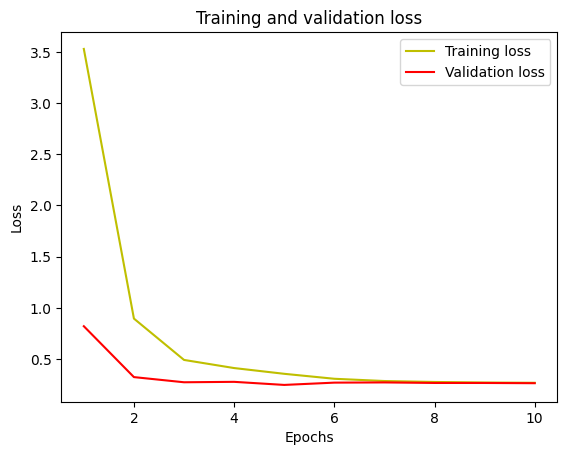

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


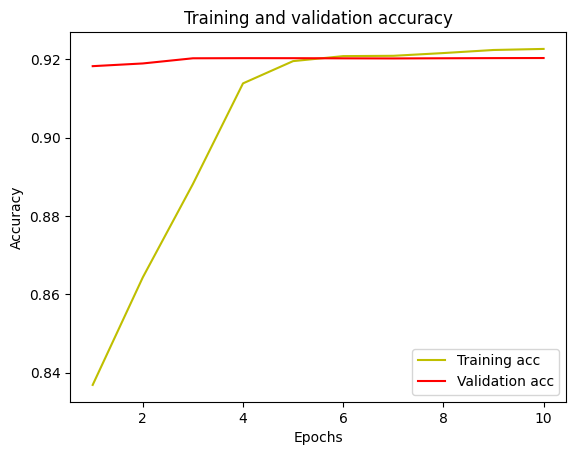

In [ ]:
acc= history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_2']
Received: inputs=Tensor(shape=(1, 512, 512, 3, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(512, 512)
(1, 512, 1)


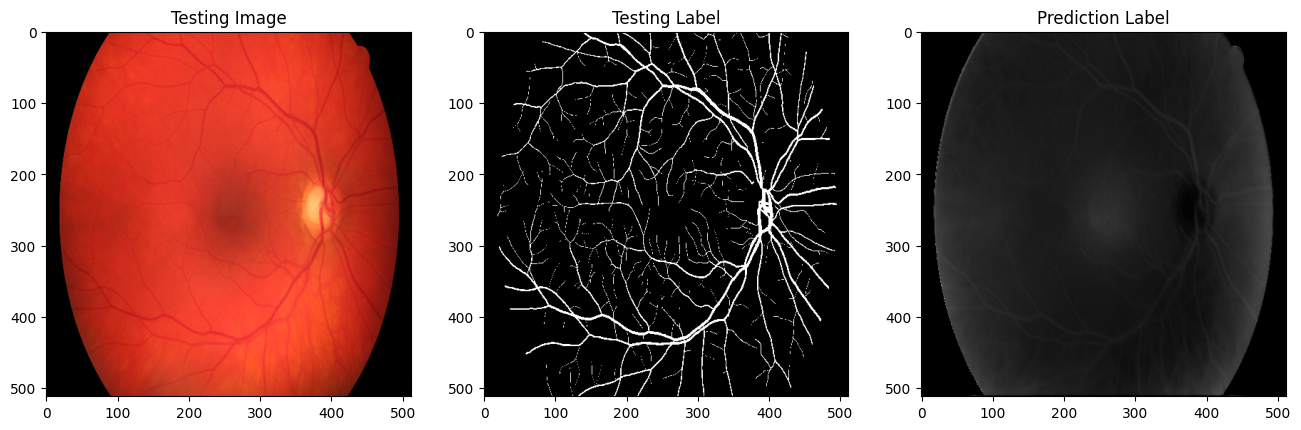

In [ ]:
from keras.models import load_model
import random
#model = load_model('Unetseg.hdf5')

test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
#test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
prediction = (model.predict(test_img_input))

pred=np.asarray(prediction)
grd =np.asarray(ground_truth)
pred.shape
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(grd[:,:,0]*255, cmap='gray')
print(grd[:,:,0].shape)
plt.subplot(133)
plt.title('Prediction Label')
#plt.imshow(pred, cmap='gray')
print(pred[:,:,0].shape)
plt.imshow((pred[0][:,:,0])*255, cmap='gray')
plt.show()

In [ ]:
#pred= np.expand_dims(pred,-1)
for i in pred:
  if(pred[i]>0.5):
    pred[i]=1
  else:
    pred[i]=0

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
prediction.shape

(1, 512, 512, 1)

In [ ]:
pred =np.asarray(prediction)
pred.shape
print(pred)

[[[[1.0613453e-01]
   [3.8234629e-02]
   [7.2796352e-02]
   ...
   [2.6497142e-03]
   [5.3753253e-02]
   [2.6121953e-01]]

  [[5.9787817e-02]
   [1.8428175e-02]
   [1.8716996e-03]
   ...
   [5.1370975e-05]
   [6.8046870e-03]
   [5.0394252e-02]]

  [[2.4359284e-02]
   [1.3007917e-03]
   [3.7215874e-04]
   ...
   [8.0371871e-07]
   [9.7924483e-04]
   [1.1277151e-02]]

  ...

  [[1.3536210e-02]
   [3.1093804e-03]
   [2.1138610e-04]
   ...
   [2.3811133e-04]
   [2.1248706e-02]
   [2.6126564e-02]]

  [[4.1592296e-02]
   [1.1581284e-02]
   [3.5996330e-03]
   ...
   [1.1964724e-03]
   [1.8473055e-02]
   [2.0093399e-01]]

  [[1.8806513e-01]
   [1.5951198e-01]
   [3.1915992e-02]
   ...
   [1.5826566e-02]
   [7.1015351e-02]
   [1.3887799e-01]]]]


In [ ]:
## tr2
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model.fit(X_train, y_train,
                    batch_size =4,
                    verbose=1,
                    epochs=10,
                    validation_data=(X_test,y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 120s 11s/step - accuracy: 0.9226 - loss: 0.2808 - val_accuracy: 0.9203 - val_loss: 0.2599
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - accuracy: 0.9210 - loss: 0.2663 - val_accuracy: 0.9203 - val_loss: 0.2545
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 105s 11s/step - accuracy: 0.9241 - loss: 0.2521 - val_accuracy: 0.9203 - val_loss: 0.2480
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 144s 11s/step - accuracy: 0.9253 - loss: 0.2459 - val_accuracy: 0.9203 - val_loss: 0.2397
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 11s/step - accuracy: 0.9229 - loss: 0.2450 - val_accuracy: 0.9204 - val_loss: 0.2282
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 11s/step - accuracy: 0.9237 - loss: 0.2302 - val_accuracy: 0.9251 - val_loss: 0.2165
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - accuracy: 0.9315 - loss: 0.2099 - val_accuracy: 0.9266 - val_loss: 0.2055
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - accuracy: 0.9324 - loss: 0.2064 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
(512, 512)
(1, 512, 1)


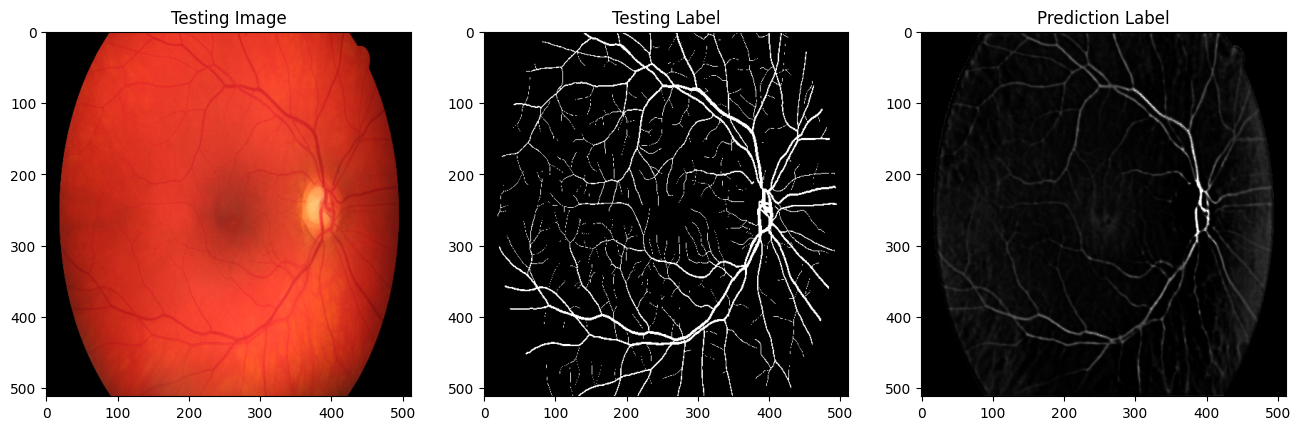

In [ ]:
from keras.models import load_model
import random
#model = load_model('Unetseg.hdf5')

test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
#test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
prediction = (model.predict(test_img_input))

pred=np.asarray(prediction)
grd =np.asarray(ground_truth)
pred.shape
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(grd[:,:,0]*255, cmap='gray')
print(grd[:,:,0].shape)
plt.subplot(133)
plt.title('Prediction Label')
#plt.imshow(pred, cmap='gray')
print(pred[:,:,0].shape)
plt.imshow((pred[0][:,:,0])*255, cmap='gray')
plt.show()

In [ ]:
##my try

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
s = inputs

    #Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

model1 = Model(inputs=[inputs], outputs=[outputs])

model1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 512, 512,  │        448 │ input_layer_2[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 512, 512,  │          0 │ conv2d_20[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 512, 512,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 256, 256,  │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 256, 256,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 256, 256,  │          0 │ conv2d_22[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 256, 256,  │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 128, 128,  │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 128, 128,  │          0 │ conv2d_24[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 128, 128,  │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 64, 64,    │          0 │ conv2d_26[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 64, 64,    │    147,584 │ dropout_12[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ conv2d_27[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## try 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Conv2DTranspose,
                                     concatenate, BatchNormalization, SpatialDropout2D,
                                     Rescaling)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Image dimensions
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS = 3


# U-Net Model Definition
def unet_model(input_size=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)):
    inputs = Input(input_size)
    s = Rescaling(1./255)(inputs)

    # Contracting Path
    c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = BatchNormalization()(c1)
    c1 = SpatialDropout2D(0.1)(c1)
    c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = SpatialDropout2D(0.1)(c2)
    c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = SpatialDropout2D(0.2)(c3)
    c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = SpatialDropout2D(0.2)(c4)
    c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = SpatialDropout2D(0.3)(c5)
    c5 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    c5 = BatchNormalization()(c5)

    # Expansive Path
    u6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = SpatialDropout2D(0.2)(c6)
    c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    c6 = BatchNormalization()(c6)

    u7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = SpatialDropout2D(0.2)(c7)
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    c7 = BatchNormalization()(c7)

    u8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = SpatialDropout2D(0.1)(c8)
    c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    c8 = BatchNormalization()(c8)

    u9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = SpatialDropout2D(0.1)(c9)
    c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    c9 = BatchNormalization()(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model




In [ ]:
# Create model
model2 = unet_model()



# Summary
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 512, 512,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 512, 512,  │        896 │ rescaling[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 512, 512,  │        128 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d   │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 512, 512,  │      9,248 │ spatial_dropout2… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        128 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 256, 256,  │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_1 │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 256, 256,  │     36,928 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_42[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_9[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_43[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_2 │ (None, 128, 128,  │          0 │ batch_normalizat

 Total params: 7,771,873 (29.65 MB)

 Trainable params: 7,765,985 (29.62 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_images,train_masks,test_size =0.1,random_state = 42)

In [11]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'model2' is not defined

In [ ]:
history = model2.fit(X_train, y_train,
                    batch_size =4,
                    verbose=1,
                    epochs=100,
                    validation_data=(X_test,y_test))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_84']
Received: inputs=Tensor(shape=(4, 512, 512, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.5382 - loss: 0.7816 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_84']
Received: inputs=Tensor(shape=(None, 512, 512, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 392s 37s/step - accuracy: 0.5415 - loss: 0.7768 - val_accuracy: 0.7134 - val_loss: 0.6753
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 368s 36s/step - accuracy: 0.6975 - loss: 0.6223 - val_accuracy: 0.2799 - val_loss: 6.5669
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 368s 35s/step - accuracy: 0.8211 - loss: 0.5603 - val_accuracy: 0.3711 - val_loss: 1.9874
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 381s 35s/step - accuracy: 0.8771 - loss: 0.5033 - val_accuracy: 0.6170 - val_loss: 0.9162
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 345s 35s/step - accuracy: 0.9166 - loss: 0.4490 - val_accuracy: 0.8522 - val_loss: 0.5187
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 383s 35s/step - accuracy: 0.9297 - loss: 0.4156 - val_accuracy: 0.9011 - val_loss: 0.4407
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 346s 35s/step - accuracy: 0.9398 - loss: 0.3804 - val_accuracy: 0.9202 - val_loss: 0.3682
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 381s 35s/step - accuracy: 0.9495 - loss: 0.3379 - val_accuracy: 0.9204

In [12]:
model2.save('new_Unetseg1.hdf5')

NameError: name 'model2' is not defined

In [8]:
_, acc = model2.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

NameError: name 'model2' is not defined

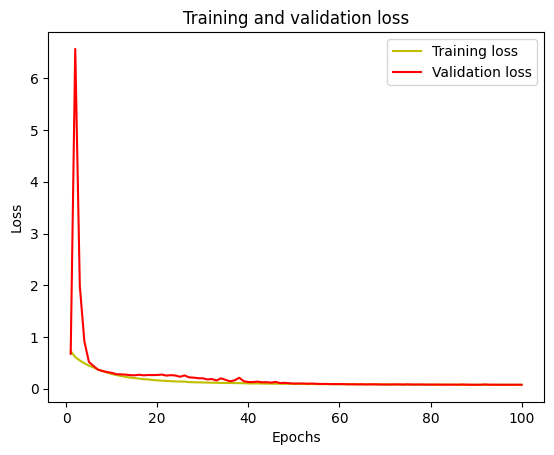

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


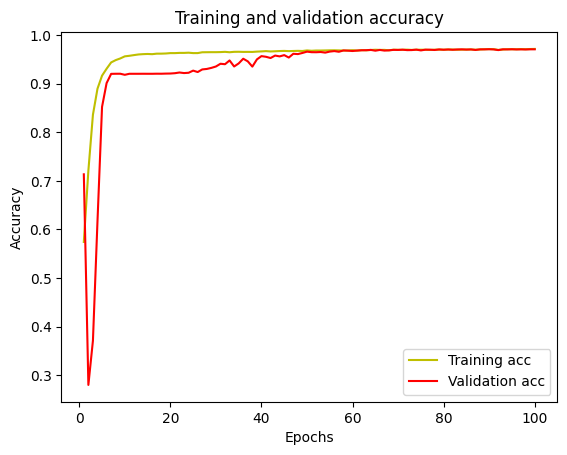

In [ ]:
acc= history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_84']
Received: inputs=Tensor(shape=(1, 512, 512, 3, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
(512, 512)
(1, 512, 1)


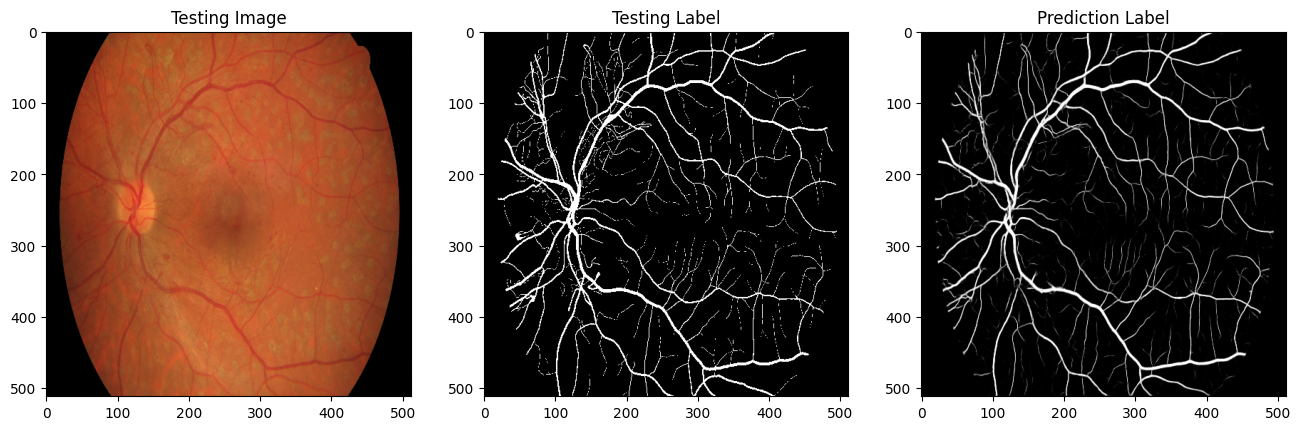

In [ ]:
from keras.models import load_model
import random
#model = load_model('Unetseg.hdf5')

test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
#test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
prediction = (model2.predict(test_img_input))

pred=np.asarray(prediction)
grd =np.asarray(ground_truth)
pred.shape
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(grd[:,:,0]*255, cmap='gray')
print(grd[:,:,0].shape)
plt.subplot(133)
plt.title('Prediction Label')
#plt.imshow(pred, cmap='gray')
print(pred[:,:,0].shape)
plt.imshow((pred[0][:,:,0])*255, cmap='gray')
plt.show()

255


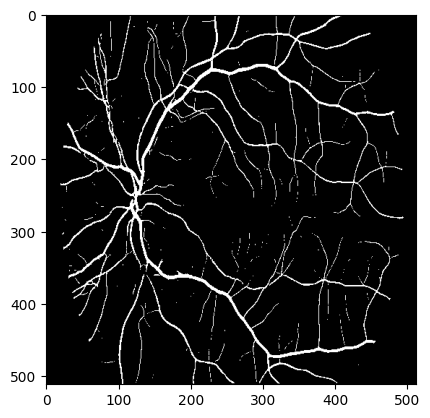

In [ ]:
p = pred[0][:,:,0]>0.5
p=p*255
print(np.max(p))
#plt.title('Prediction on test image')
plt.imshow(p, cmap='gray')
plt.show()

In [ ]:
pred =np.asarray(prediction)
pred.shape
print(pred)

[[[[0.02593261]
   [0.01661523]
   [0.00915226]
   ...
   [0.00971062]
   [0.01047661]
   [0.02439357]]

  [[0.00428778]
   [0.00294374]
   [0.00225094]
   ...
   [0.00271572]
   [0.00378191]
   [0.00742577]]

  [[0.0032348 ]
   [0.00248045]
   [0.00164776]
   ...
   [0.00197761]
   [0.00236921]
   [0.0043698 ]]

  ...

  [[0.00456305]
   [0.00335833]
   [0.00213123]
   ...
   [0.00190425]
   [0.00253624]
   [0.00431829]]

  [[0.00634421]
   [0.00374346]
   [0.00267619]
   ...
   [0.00213919]
   [0.00336735]
   [0.00632795]]

  [[0.01746018]
   [0.00615398]
   [0.00554387]
   ...
   [0.00655419]
   [0.00717716]
   [0.02092064]]]]


255


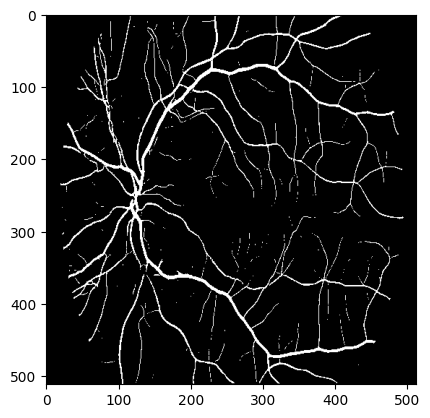

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
p = pred[0][:,:,0]>0.5
p=p*255
print(np.max(p))
#plt.title('Prediction on test image')
plt.imshow(p, cmap='gray')
plt.show()
list(p)

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Pick a random test sample
ix = random.randint(0, len(preds_test_t)- 1)

# Show original image
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.title('Test Image')
plt.imshow(X_test[ix])  # assuming X_test is in RGB or grayscale format
plt.axis('off')

# Show ground truth
plt.subplot(1, 3, 2)
plt.title('Ground Truth')
plt.imshow(np.squeeze(y_test[ix]), cmap='gray')
plt.axis('off')

# Show predicted mask
plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(np.squeeze(preds_test_t[ix]), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
pred_t = (pred > 0.5).astype(np.uint8)
# Simulated prediction for a batch of 4 images (each 512x512 grayscale)
pred = np.random.rand(4, 512, 512, 1)

# Threshold all predictions
pred_binary = (pred > 0.5).astype(np.uint8)

# Check unique values
print(np.unique(pred_binary))  # Output: [0 1]
print(pred_binary.shape)       # Output: (4, 512, 512, 1)

[0 1]
(4, 512, 512, 1)


In [ ]:
prediction.shape

(1, 512, 512, 1)

In [ ]:
pred =np.asarray(prediction)
pred.shape
print(pred)

[[[[0.02593261]
   [0.01661523]
   [0.00915226]
   ...
   [0.00971062]
   [0.01047661]
   [0.02439357]]

  [[0.00428778]
   [0.00294374]
   [0.00225094]
   ...
   [0.00271572]
   [0.00378191]
   [0.00742577]]

  [[0.0032348 ]
   [0.00248045]
   [0.00164776]
   ...
   [0.00197761]
   [0.00236921]
   [0.0043698 ]]

  ...

  [[0.00456305]
   [0.00335833]
   [0.00213123]
   ...
   [0.00190425]
   [0.00253624]
   [0.00431829]]

  [[0.00634421]
   [0.00374346]
   [0.00267619]
   ...
   [0.00213919]
   [0.00336735]
   [0.00632795]]

  [[0.01746018]
   [0.00615398]
   [0.00554387]
   ...
   [0.00655419]
   [0.00717716]
   [0.02092064]]]]


In [ ]:
#IOU
y_pred=model2.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

ValueError: as_list() is not defined on an unknown TensorShape.

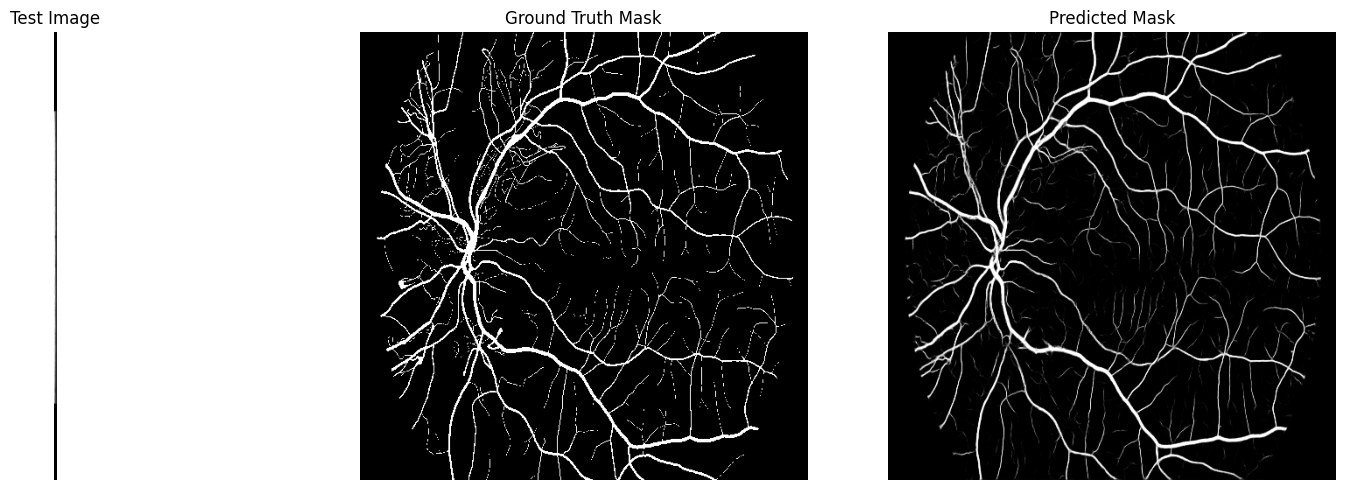

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select a sample index from the batch
ix = 0  # or any number < batch size (e.g., 0 to 4)

# Squeeze and select one image from each
test_img_disp = np.squeeze(test_img[ix])       # shape: (512, 512) or (512, 512, 3)
y_test_disp = np.squeeze(y_test[ix])           # shape: (512, 512)
prediction_disp = np.squeeze(prediction[ix])   # shape: (512, 512)

# Plot
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.title('Test Image')
plt.imshow(test_img_disp, cmap='gray' if test_img_disp.ndim == 2 else None)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Ground Truth Mask')
plt.imshow(y_test_disp, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(prediction_disp, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


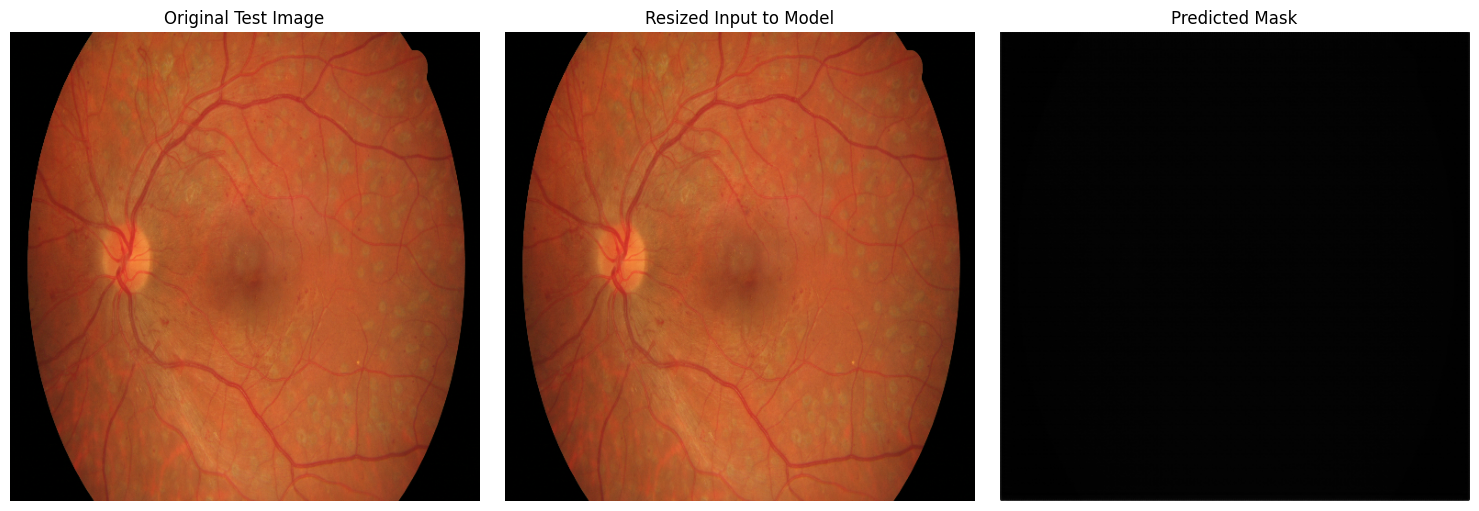

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

# Load model
model = load_model('new_Unetseg1.hdf5', compile=False)

# Index of image to test
n = 0

# Get the original test image
image = X_test[n]  # shape assumed to be (512, 512, 3) or something similar

# Resize to model's expected input size
img_resized = cv2.resize(image, (512, 512))  # Match model input shape
img_resized = img_resized.astype('float32') / 255.0  # Normalize

# Expand dims to match batch input shape: (1, 512, 512, 3)
input_img = np.expand_dims(img_resized, axis=0)

# Predict
prediction = model.predict(input_img)[0]  # shape: (512, 512, 1)

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Test Image")
plt.imshow(image.astype(np.uint8))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Resized Input to Model")
plt.imshow(img_resized)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Predicted Mask")
plt.imshow(np.squeeze(prediction), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

My segnet

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, UpSampling2D,
                                     BatchNormalization, SpatialDropout2D, Rescaling, LeakyReLU)

def enhanced_segnet(input_size=(512, 512, 3)):
    inputs = Input(input_size)
    x = Rescaling(1. / 255)(inputs)

    # --- Encoder ---
    # Block 1
    x = Conv2D(64, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(64, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = SpatialDropout2D(0.1)(x)
    x1 = MaxPooling2D(pool_size=(2, 2))(x)  # 256

    # Block 2
    x = Conv2D(128, (5, 5), padding='same')(x1)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(128, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = SpatialDropout2D(0.1)(x)
    x2 = MaxPooling2D(pool_size=(2, 2))(x)  # 128

    # Block 3
    x = Conv2D(256, (5, 5), padding='same')(x2)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(256, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = SpatialDropout2D(0.2)(x)
    x3 = MaxPooling2D(pool_size=(2, 2))(x)  # 64

    # Block 4
    x = Conv2D(512, (5, 5), padding='same')(x3)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(512, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = SpatialDropout2D(0.3)(x)
    x4 = MaxPooling2D(pool_size=(2, 2))(x)  # 32

    # --- Decoder ---
    # Block 4
    x = UpSampling2D(size=(2, 2))(x4)  # 64
    x = Conv2D(512, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(512, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Block 3
    x = UpSampling2D(size=(2, 2))(x)  # 128
    x = Conv2D(256, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(256, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Block 2
    x = UpSampling2D(size=(2, 2))(x)  # 256
    x = Conv2D(128, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(128, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Block 1
    x = UpSampling2D(size=(2, 2))(x)  # 512
    x = Conv2D(64, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv2D(64, (5, 5), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

In [5]:
# Create model
model3 = enhanced_segnet()



# Summary
model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 512, 512, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512, 512, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 512, 512, 64)   │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512, 512, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 512, 512, 64)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 128)  │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256, 256, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 128)  │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 256, 256, 128)  │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 256)  │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 32,587,265 (124.31 MB)

 Trainable params: 32,579,585 (124.28 MB)

 Non-trainable params: 7,680 (30.00 KB)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    train_images, train_masks,
    test_size=0.1, random_state=42
)

# Second split: from training set -> Train + Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1, random_state=42  # 10% of train used for validation
)

NameError: name 'train_test_split' is not defined

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

#Compile the model
model3.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

NameError: name 'model3' is not defined

In [ ]:
ḍḍ = model3.fit(
    x=X_train,             # Training images
    y=y_train,             # Training masks
    validation_data=(X_val, y_val),  # Validation data
    batch_size=8,
    epochs=30,
   verbose=1
)

NameError: name 'model3' is not defined